## 자동차 가격 예측하기
- 데이터셋 : train_car_price_data.csv  
- 목적 : price 예측  
- 학습방법 : 지도학습 > 회귀  
- 알고리즘 : LinearRegression  

[1] 모듈 준비

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[2] 데이터 준비

In [269]:


file_path = r'C:\baekjoon-solutions\연습\train_car_price_data.csv'
df = pd.read_csv(file_path)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [270]:
# 데이터가공
df['Mileage'] = pd.to_numeric(df['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').str.replace('null', ''), errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'].str.replace(' CC', '').str.replace('null', ''), errors='coerce')
df['Power'] = pd.to_numeric(df['Power'].str.replace(' bhp', '').str.replace('null', ''), errors='coerce')

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 658.5+ KB


In [272]:

df = df.drop(columns=['New_Price'],axis=1)

In [273]:
#결측치 제거
df_cleaned = df.dropna()

In [274]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5872 non-null   int64  
 1   Name               5872 non-null   object 
 2   Location           5872 non-null   object 
 3   Year               5872 non-null   int64  
 4   Kilometers_Driven  5872 non-null   int64  
 5   Fuel_Type          5872 non-null   object 
 6   Transmission       5872 non-null   object 
 7   Owner_Type         5872 non-null   object 
 8   Mileage            5872 non-null   float64
 9   Engine             5872 non-null   float64
 10  Power              5872 non-null   float64
 11  Seats              5872 non-null   float64
 12  Price              5872 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 642.2+ KB


In [275]:
df_cleaned.corr(numeric_only=True)

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Unnamed: 0,1.000000,-0.000206,-0.008381,0.015272,-0.006083,-0.012701,-0.014061,-0.021191
Year,-0.000206,1.000000,-0.169369,0.285623,-0.068045,0.014531,0.007833,0.299475
Kilometers_Driven,-0.008381,-0.169369,1.000000,-0.060608,0.093030,0.033490,0.083072,-0.008249
Mileage,0.015272,0.285623,-0.060608,1.000000,-0.637258,-0.538844,-0.331576,-0.341652
Engine,-0.006083,-0.068045,0.093030,-0.637258,1.000000,0.866301,0.401116,0.658047
Power,-0.012701,0.014531,0.033490,-0.538844,0.866301,1.000000,0.101460,0.772843
Seats,-0.014061,0.007833,0.083072,-0.331576,0.401116,0.101460,1.000000,0.055547
Price,-0.021191,0.299475,-0.008249,-0.341652,0.658047,0.772843,0.055547,1.000000


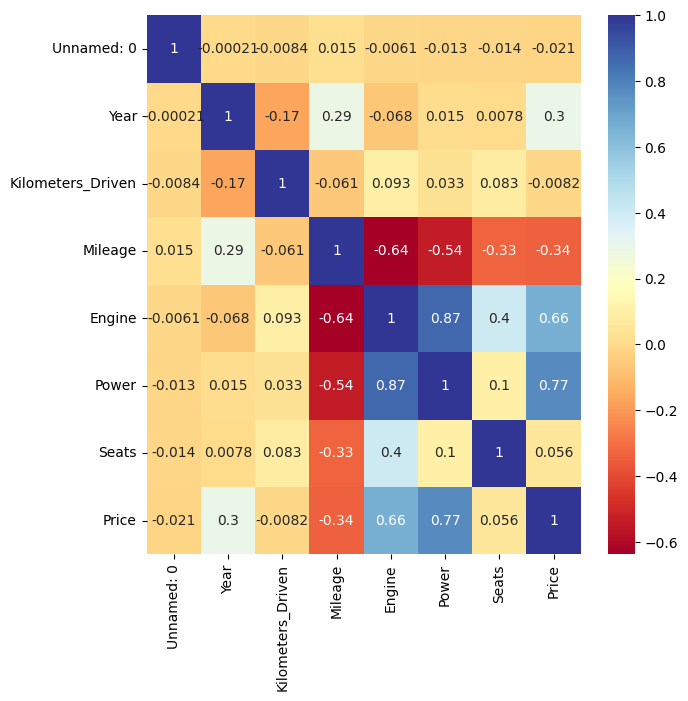

In [276]:
plt.figure(figsize=(7,7))
g = sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='RdYlBu')

[3] 학습준비

In [277]:
features = df_cleaned[['Year', 'Mileage', 'Engine', 'Power']]
target = df_cleaned['Price']
print(f'features : {features.shape}, {features.ndim}D')
print(f'target : {target.shape}, {target.ndim}D')

features : (5872, 4), 2D
target : (5872,), 1D


In [278]:
from sklearn.model_selection import train_test_split

[3-2] 학습용 & 테스트용 데이터셋 분리

In [279]:
# train:test = 80:20 ==> test_size = 0.2 또는 train_size = 0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율 고려
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [280]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (4697, 4), 2D
y_train : (4697,), 1D
X_test : (1175, 4), 2D
y_test : (1175,), 1D


In [281]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

[3-3] 피쳐스케일

In [282]:
from sklearn.preprocessing import MinMaxScaler

In [283]:
# 스케일러 인스턴스 생성
mmScaler=MinMaxScaler()

In [284]:
# MinMaxScaler에 데이터셋 전용에 속성값 설정
mmScaler.fit(X_train)

MinMaxScaler()

In [285]:
# 학습용, 테스트용 데이터셋 스케일링 진행
# 학습용 데이터 ==> 스케일링 ==> ndarray 타입 반환
X_train_scaled=mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()

((4697, 4), np.float64(0.0), np.float64(1.0))

In [286]:
# 테스트용 데이터 ==> 스케일링  ==> ndarray 타입 반환
X_test_scaled= mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((1175, 4), np.float64(0.0), np.float64(1.0))

[4] 모델 생성

In [287]:
from sklearn.linear_model import LinearRegression

In [288]:
# 객체생성
model = LinearRegression()

In [289]:
model.fit(X_train_scaled, y_train)

LinearRegression()

[5] 모델 성능평가

In [290]:
model.score(X_test_scaled, y_test)

0.6691859376538674

In [291]:
from sklearn.metrics import mean_squared_error, r2_score

In [292]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test_scaled)

# 모델의 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'mse : {mse}')
print(f'r2 : {r2}') 

mse : 36.41490578276986
r2 : 0.6691859376538674


In [293]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [294]:
df_results

,Actual,Predicted
0,9.00,21.652864
1,2.00,-4.293704
2,4.40,3.020539
3,51.69,47.544606
4,5.50,8.850455
...,...,...
1170,8.85,8.135836
1171,2.49,0.642069
1172,3.80,3.753229
1173,6.50,12.005866


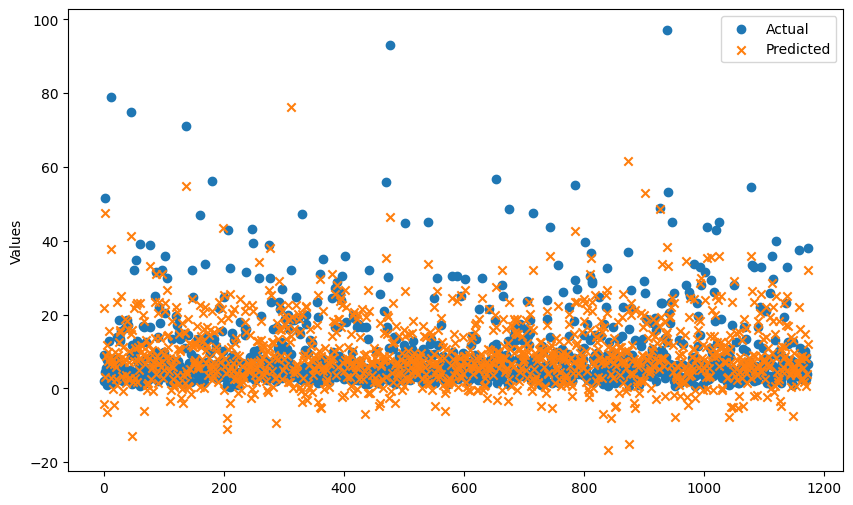

In [295]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results.index, df_results['Actual'], label='Actual', marker='o')
plt.scatter(df_results.index, df_results['Predicted'], label='Predicted', marker='x')
plt.ylabel('Values')
plt.legend()
plt.show()

## test csv로 한번해보기
- 데이터셋: test_car_price_data.csv

[1] 데이터 전처리

In [296]:
file_path = r'C:\baekjoon-solutions\연습\test_car_price_data.csv'
test_df = pd.read_csv(file_path)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [297]:
test_df['Mileage'] = pd.to_numeric(test_df['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').str.replace('null', ''), errors='coerce')
test_df['Engine'] = pd.to_numeric(test_df['Engine'].str.replace(' CC', '').str.replace('null', ''), errors='coerce')
test_df['Power'] = pd.to_numeric(test_df['Power'].str.replace(' bhp', '').str.replace('null', ''), errors='coerce')

In [298]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   float64
 9   Engine             1224 non-null   float64
 10  Power              1202 non-null   float64
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 125.5+ KB


In [299]:
test_df = test_df.drop(columns=['New_Price','Unnamed: 0'],axis=1)

In [300]:
test_df_cleaned = test_df.dropna()

In [301]:
test_df_cleaned

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0


In [302]:
test_features = test_df_cleaned[['Year', 'Mileage', 'Engine', 'Power']]

피쳐스케일링

In [303]:
# 기존의 스케일링에 그대로 넣어주었다.
test_scaled = mmScaler.transform(test_features)

[2] Price 예측

In [304]:
y_pred = model.predict(test_scaled)

In [305]:
y_pred

array([ 1.17356364, -1.7093162 , 19.21149674, ...,  0.1854731 ,
        7.33407882, 19.37860539])

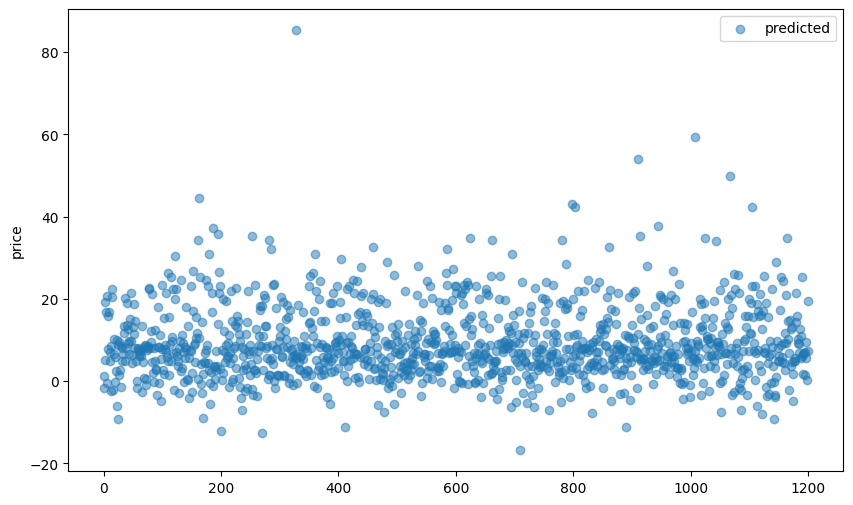

In [306]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_pred, label='predicted' ,alpha=0.5)
plt.ylabel('price')
plt.legend()
plt.show()

In [307]:
# 예측된 price를 데이터프레임에 추가
test_df_cleaned.loc[:,'Predicted_Price'] = y_pred

C:\Users\user\AppData\Local\Temp\ipykernel_23324\2680643782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_cleaned.loc[:,'Predicted_Price'] = y_pred


In [308]:
test_df_cleaned

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Predicted_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,1.173564
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,-1.709316
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,19.211497
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,5.142336
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0,16.809573
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.548002
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,9.408192
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,0.185473
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,7.334079


[3] 3D로 시각화

In [309]:
from mpl_toolkits.mplot3d import axes3d

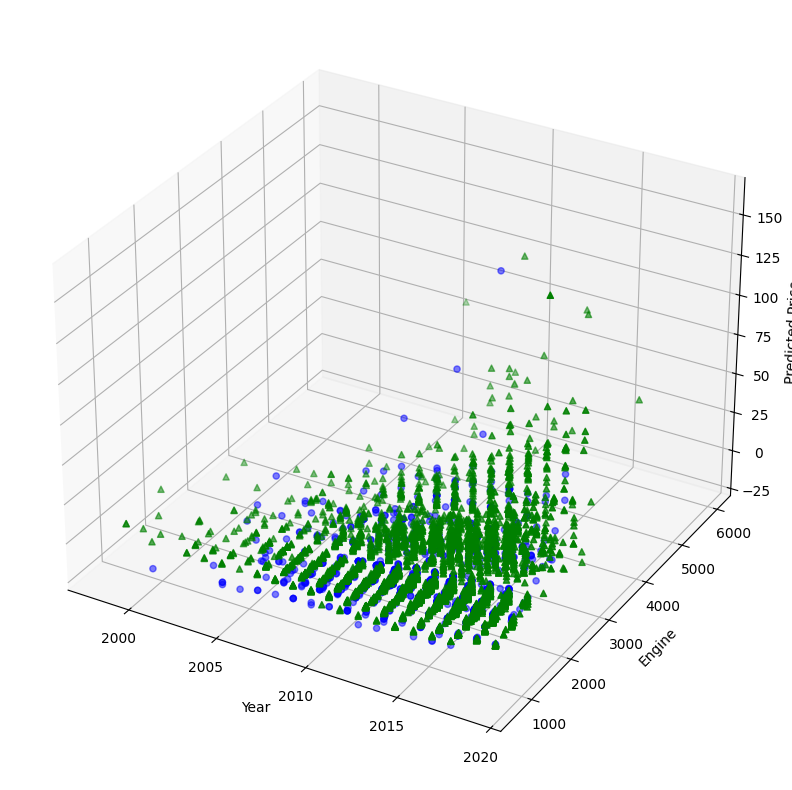

In [311]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(test_df_cleaned['Year'], test_df_cleaned['Engine'], test_df_cleaned['Predicted_Price'], c='b', marker='o', alpha=0.5)
ax.scatter(df_cleaned['Year'], df_cleaned['Engine'], df_cleaned['Price'], c='g', marker='^')
ax.set_xlabel('Year')
ax.set_ylabel('Engine')
ax.set_zlabel('Predicted Price')
plt.show()